In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot(file_path):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Define the unique values for noise_std and batch_size
    noise_vals = df['noise_std'].unique()
    batch_sizes = sorted(df['batch_size'].unique())

    # Set up subplots for the three metrics
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))

    colors = ['#6A3D9A', '#9B6BAF', '#C28E82', '#8B5A2B']


    # Loop through each noise_std and plot the corresponding curves for each metric
    for i, noise in enumerate(noise_vals):
        noise_data = df[df['noise_std'] == noise]
        color = colors[i % len(colors)] 
        
        # Plot 'best_acc' with markers
        best_acc_values = [noise_data[noise_data['batch_size'] == batch]['best_acc'].values[0] for batch in batch_sizes]
        axs[0].plot(batch_sizes, best_acc_values, label=f'Noise {noise}', marker='o', markersize=6, color=color)
        
        # Plot 'm_sharpness' with markers
        m_sharpness_values = [noise_data[noise_data['batch_size'] == batch]['m_sharpness'].values[0] for batch in batch_sizes]
        axs[1].plot(batch_sizes, m_sharpness_values, label=f'Noise {noise}', marker='o', markersize=6, color=color)
        
        # Plot 'top_eigen' with markers
        top_eigen_values = [noise_data[noise_data['batch_size'] == batch]['top_eigen'].values[0] for batch in batch_sizes]
        axs[2].plot(batch_sizes, top_eigen_values, label=f'Noise {noise}', marker='o', markersize=6, color=color)

        fisher = [noise_data[noise_data['batch_size'] == batch]['fisher_rao'].values[0] for batch in batch_sizes]
        axs[3].plot(batch_sizes, fisher, label=f'Noise {noise}', marker='o', markersize=6, color=color)

    # Set labels and titles
    axs[0].set_title('Best Accuracy vs Batch Size')
    axs[1].set_title('128-Sharpness (ρ=0.05) vs Batch Size')
    axs[2].set_title('Top Eigen vs Batch Size')
    axs[3].set_title('Fisher Rao vs Batch Size')

    # Set axis labels
    for ax in axs:
        ax.set_xlabel('Batch Size')
        ax.set_ylabel('Value')

    # Add a legend
    for ax in axs:
        ax.legend()

    plt.suptitle(f'Plot for File: {file_path}', fontsize=16)
    # Show the plots
    plt.tight_layout()
    plt.show()

def plot_vs(sam_file, sgd_file):
    df_sam = pd.read_csv(sam_file)
    df_sgd = pd.read_csv(sgd_file)

    noise_vals = df_sam['noise_std'].unique()
    batch_sizes = sorted(df_sam['batch_size'].unique())
    
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))
    colors = ['#6A3D9A', '#9B6BAF', '#C28E82', '#8B5A2B']
    
    for i, noise in enumerate(noise_vals):
        sam_data = df_sam[df_sam['noise_std'] == noise]
        sgd_data = df_sgd[df_sgd['noise_std'] == noise]
        
        best_acc_values_sam = [sam_data[sam_data['batch_size'] == batch]['best_acc'].values[0] for batch in batch_sizes]
        best_acc_values_sgd = [sgd_data[sgd_data['batch_size'] == batch]['best_acc'].values[0] for batch in batch_sizes]
        
        color = colors[i % len(colors)]  # Cycle through color list
        axs[0].plot(batch_sizes, best_acc_values_sam, label=f'Noise {noise} (SAM)', marker='o', markersize=6, color=color)
        axs[0].plot(batch_sizes, best_acc_values_sgd, linestyle='dashed', marker='o', markersize=6, color=color, label=f'Noise {noise} (SGD)')
        
        m_sharpness_values = [sam_data[sam_data['batch_size'] == batch]['m_sharpness'].values[0] for batch in batch_sizes]
        axs[1].plot(batch_sizes, m_sharpness_values, label=f'Noise {noise}', marker='o', markersize=6, color=color)
        
        top_eigen_values = [sam_data[sam_data['batch_size'] == batch]['top_eigen'].values[0] for batch in batch_sizes]
        axs[2].plot(batch_sizes, top_eigen_values, label=f'Noise {noise}', marker='o', markersize=6, color=color)
        
        fisher = [sam_data[sam_data['batch_size'] == batch]['fisher_rao'].values[0] for batch in batch_sizes]
        axs[3].plot(batch_sizes, fisher, label=f'Noise {noise}', marker='o', markersize=6, color=color)
    
    axs[0].set_title('Best Accuracy vs Batch Size')
    axs[1].set_title('128-Sharpness (ρ=0.05) vs Batch Size')
    axs[2].set_title('Top Eigen vs Batch Size')
    axs[3].set_title('Fisher Rao vs Batch Size')
    
    for ax in axs:
        ax.set_xlabel('Batch Size')
        ax.set_ylabel('Value')
        ax.legend()
    
    plt.suptitle(f'Comparison: {sam_file} (SAM) vs {sgd_file} (SGD)', fontsize=16)
    plt.tight_layout()
    plt.show()


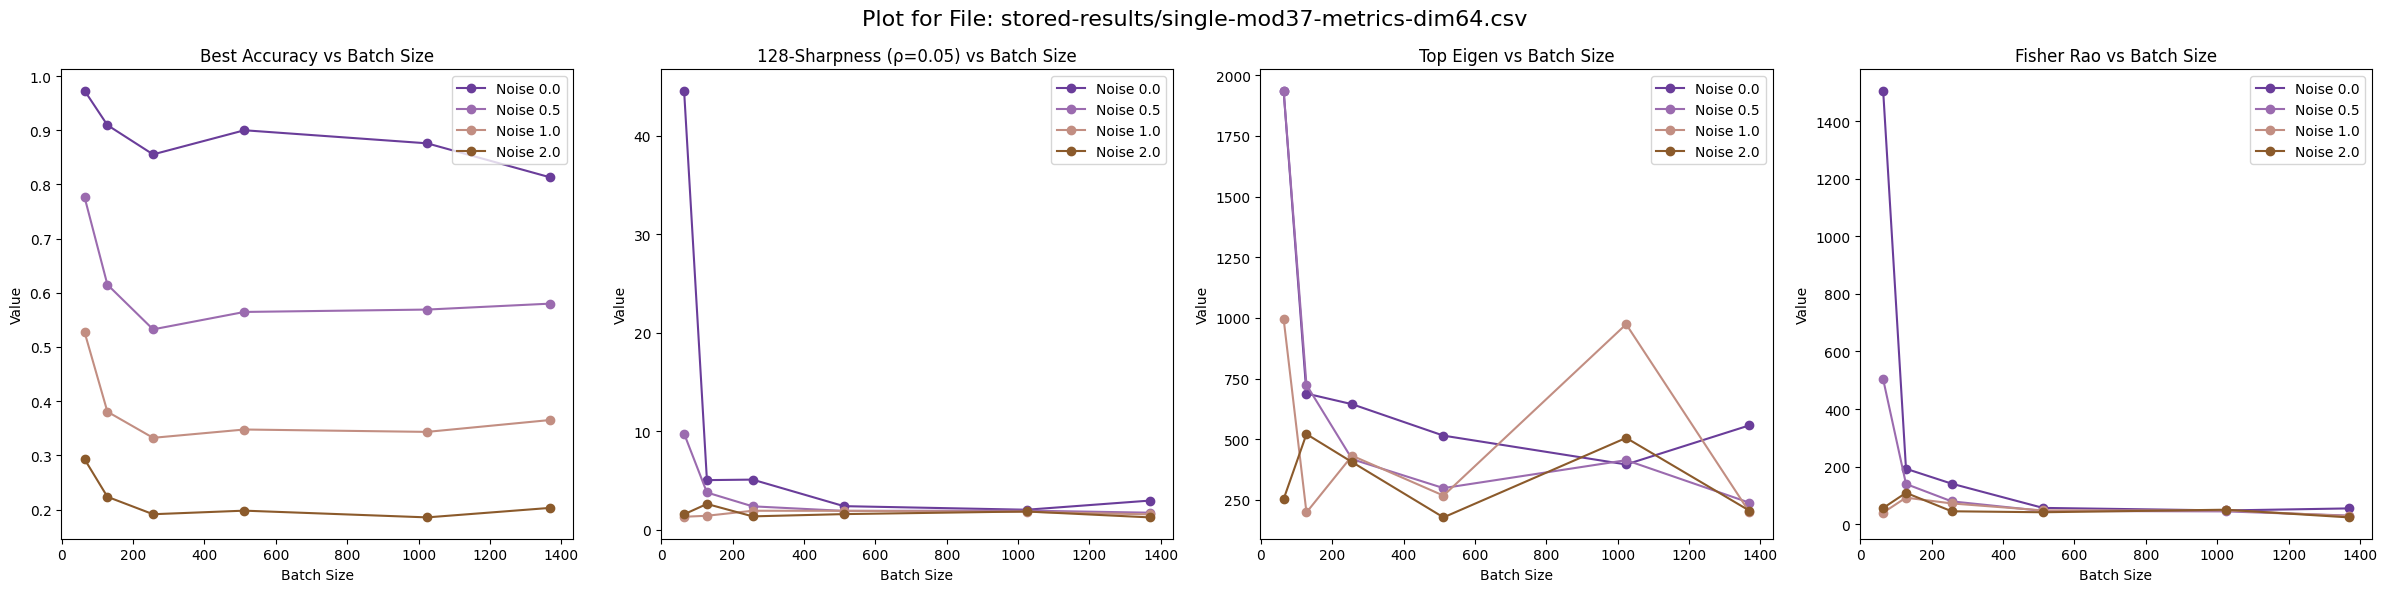

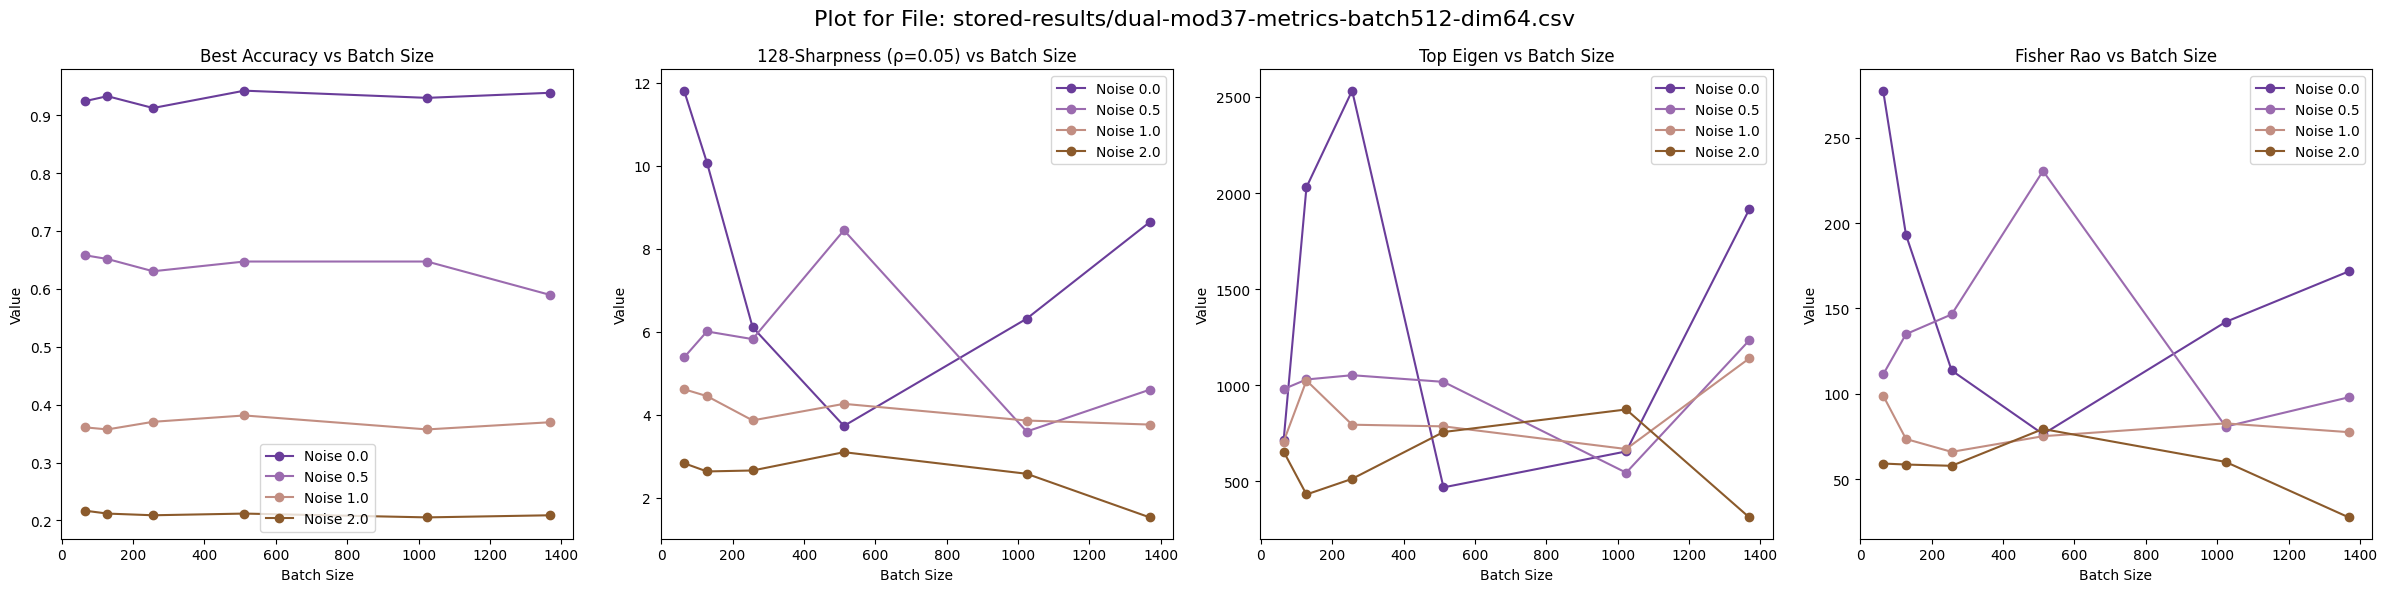

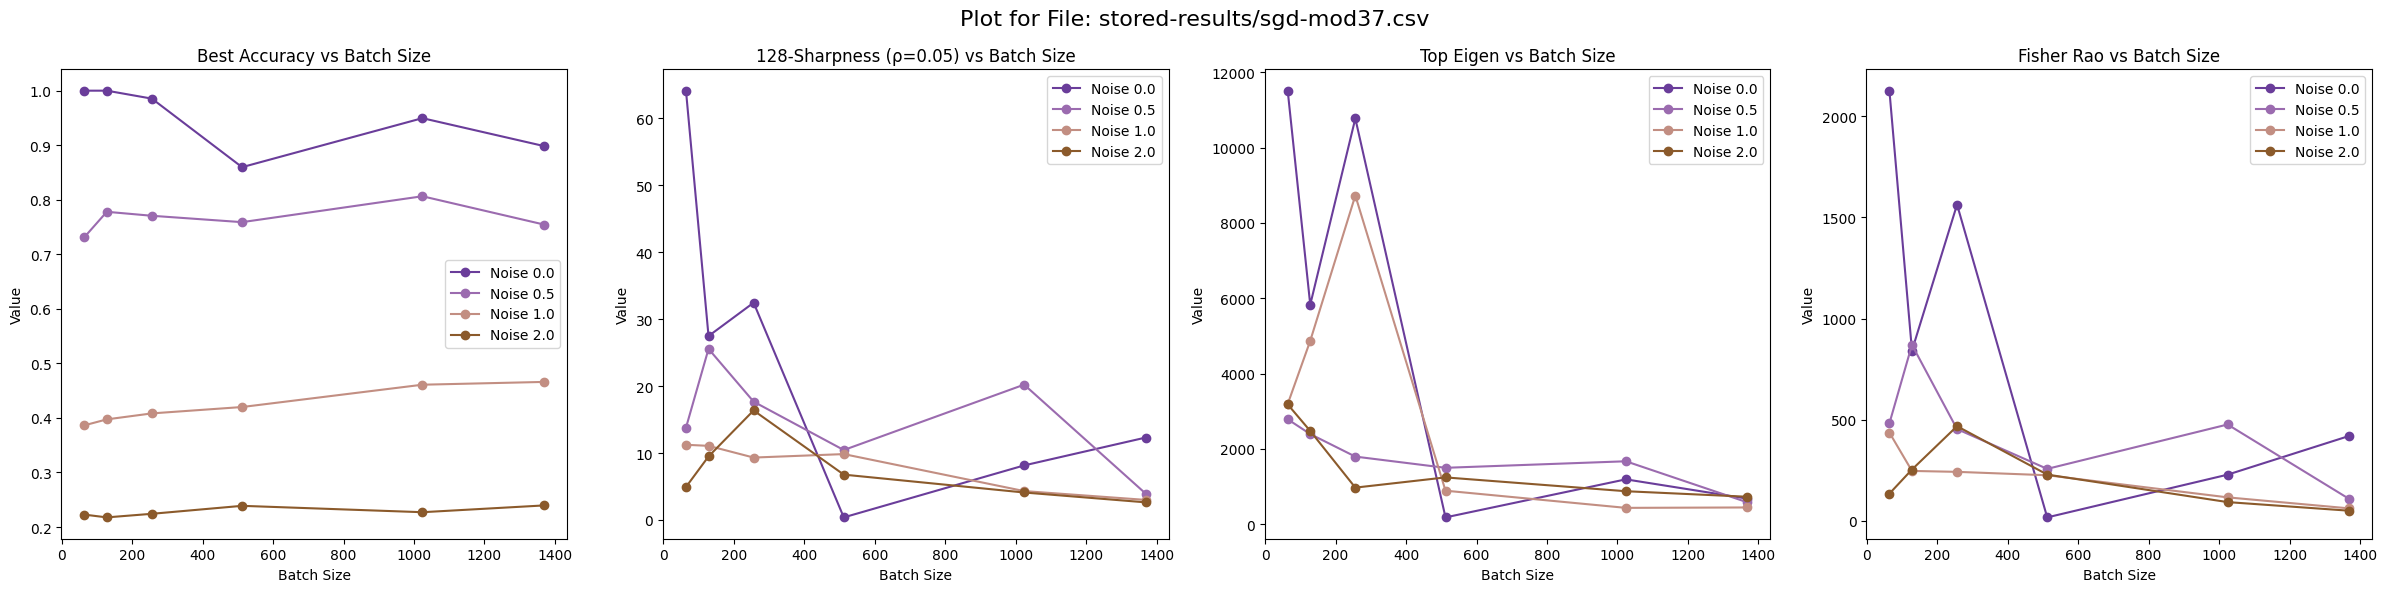

In [2]:
import os

single_mod37 = "stored-results/single-mod37-metrics-dim64.csv"
dual_mod37 = "stored-results/dual-mod37-metrics-batch512-dim64.csv"
sgd_mod37 = "stored-results/sgd-mod37.csv"

plot(single_mod37)
plot(dual_mod37)
plot(sgd_mod37)


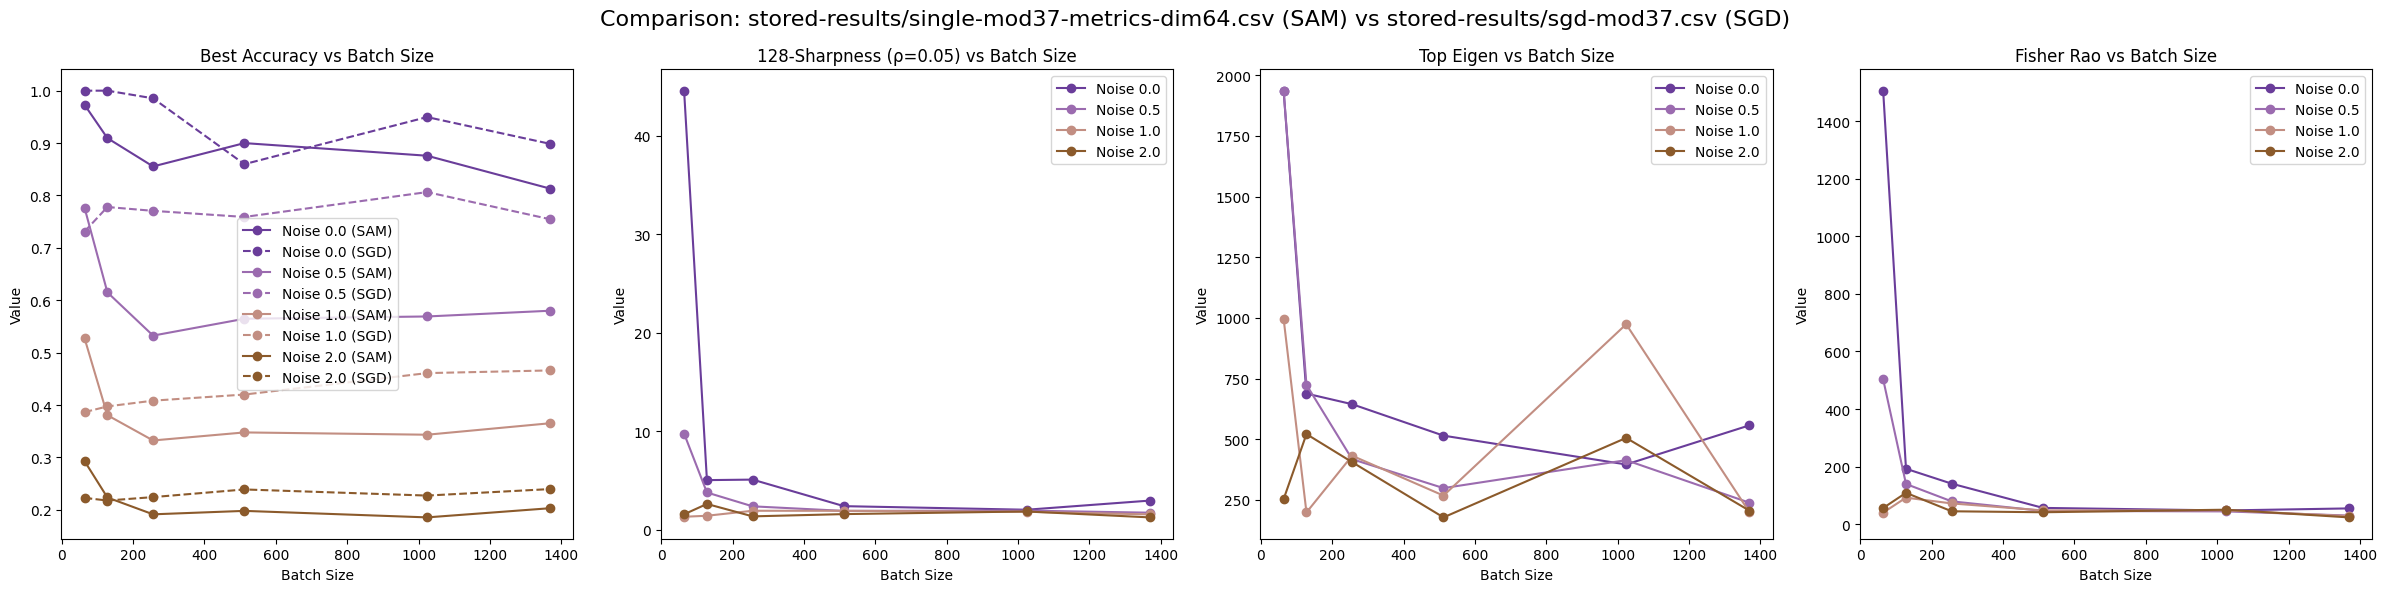

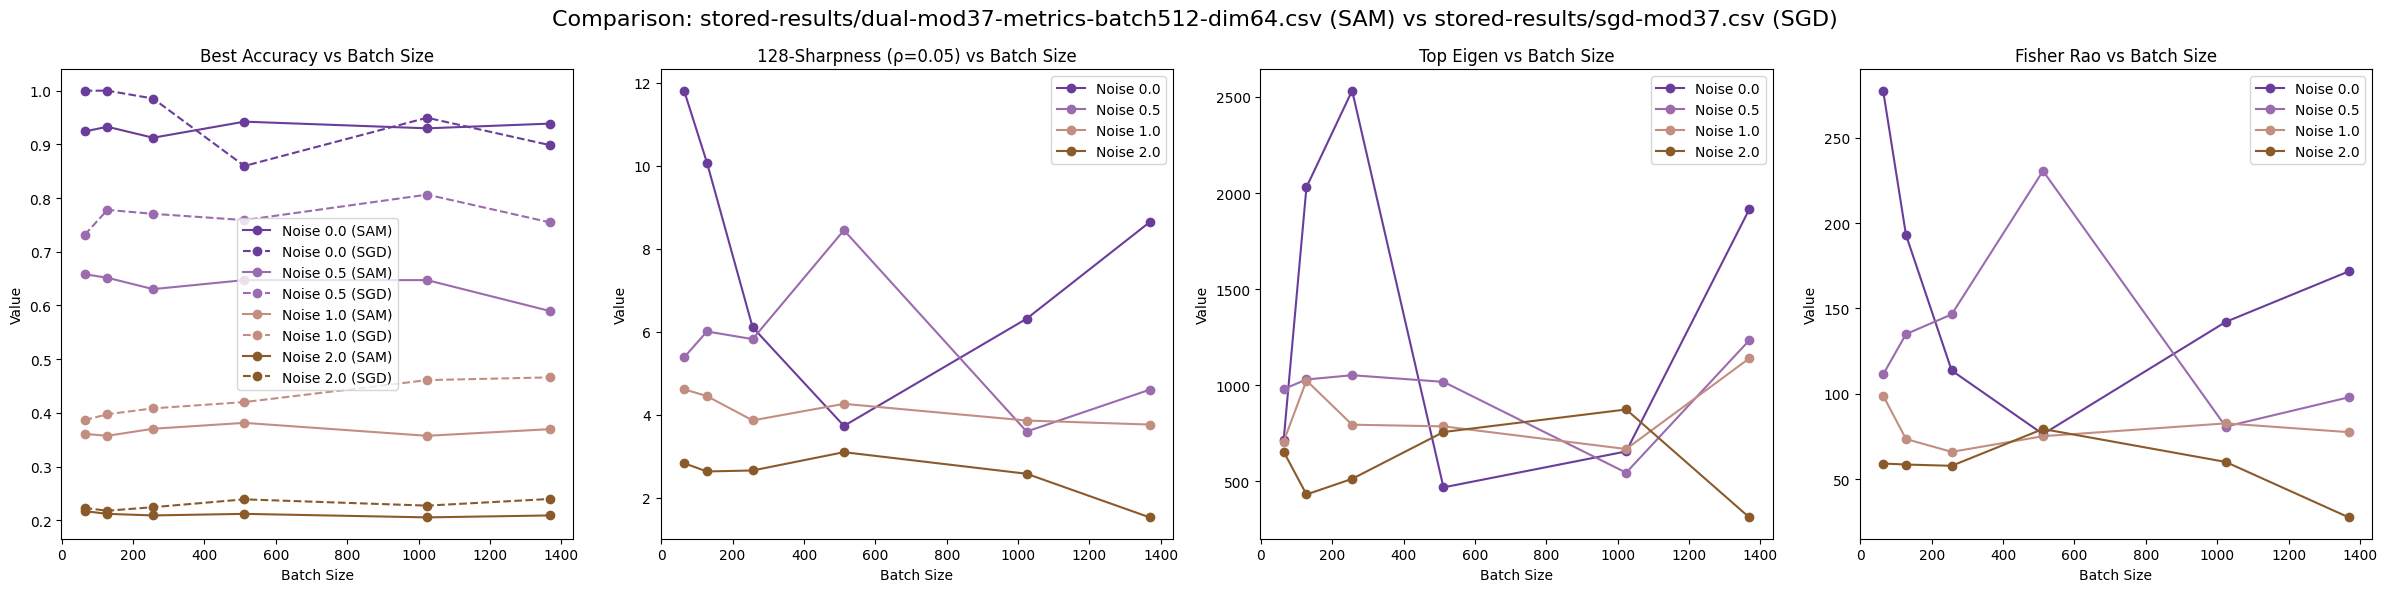

In [3]:
plot_vs(single_mod37, sgd_mod37)
plot_vs(dual_mod37, sgd_mod37)

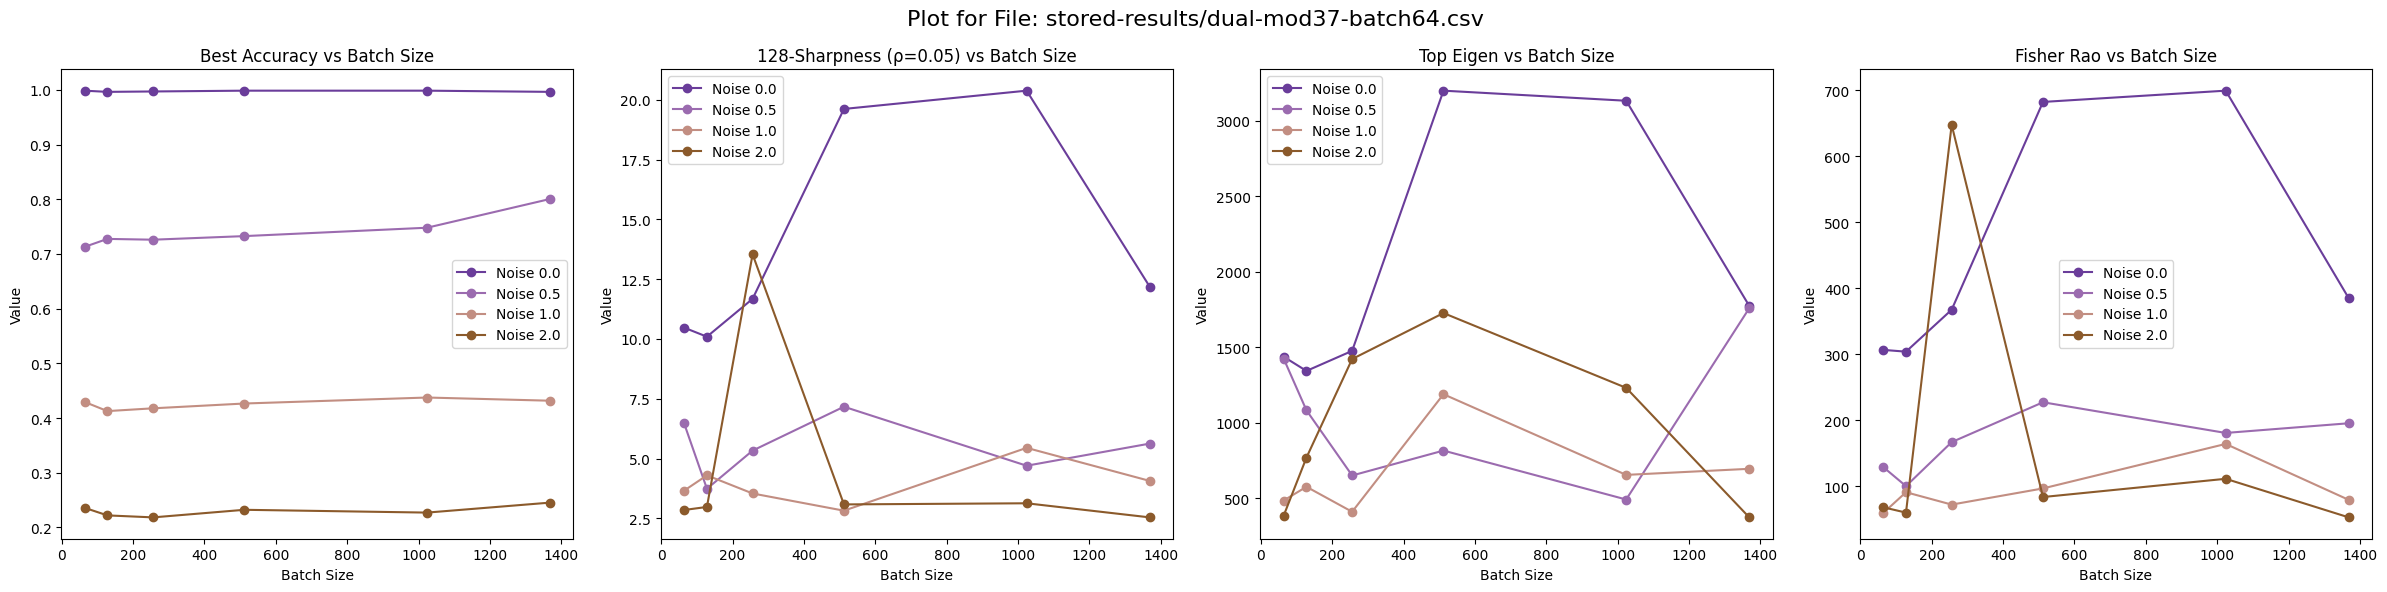

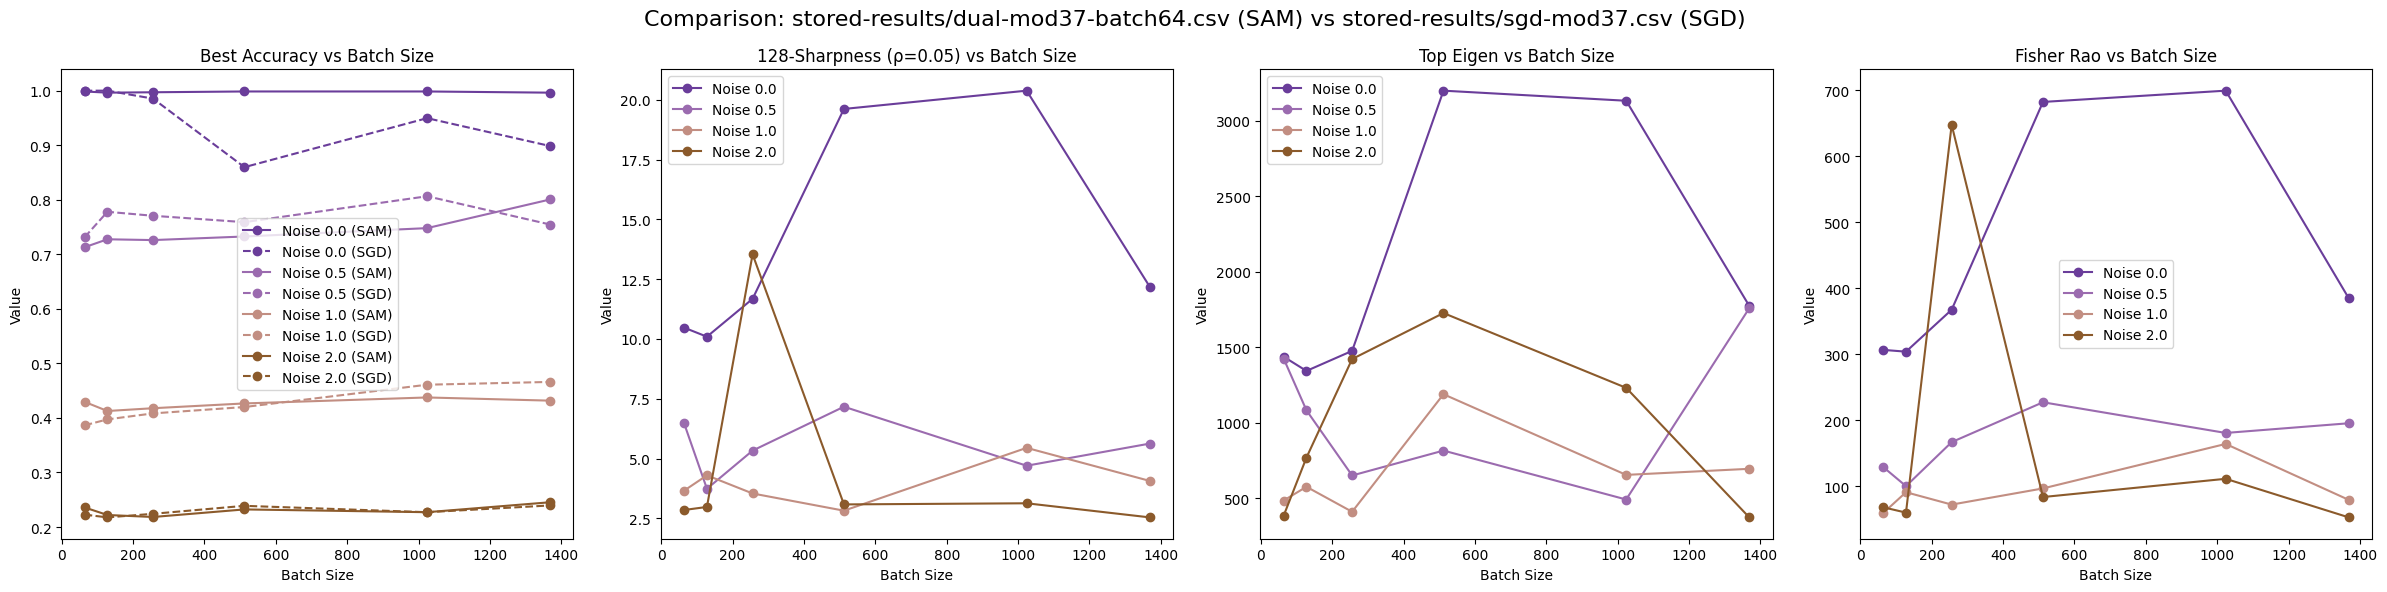

In [4]:
batch64 = "stored-results/dual-mod37-batch64.csv"
plot(batch64)
plot_vs(batch64, sgd_mod37)

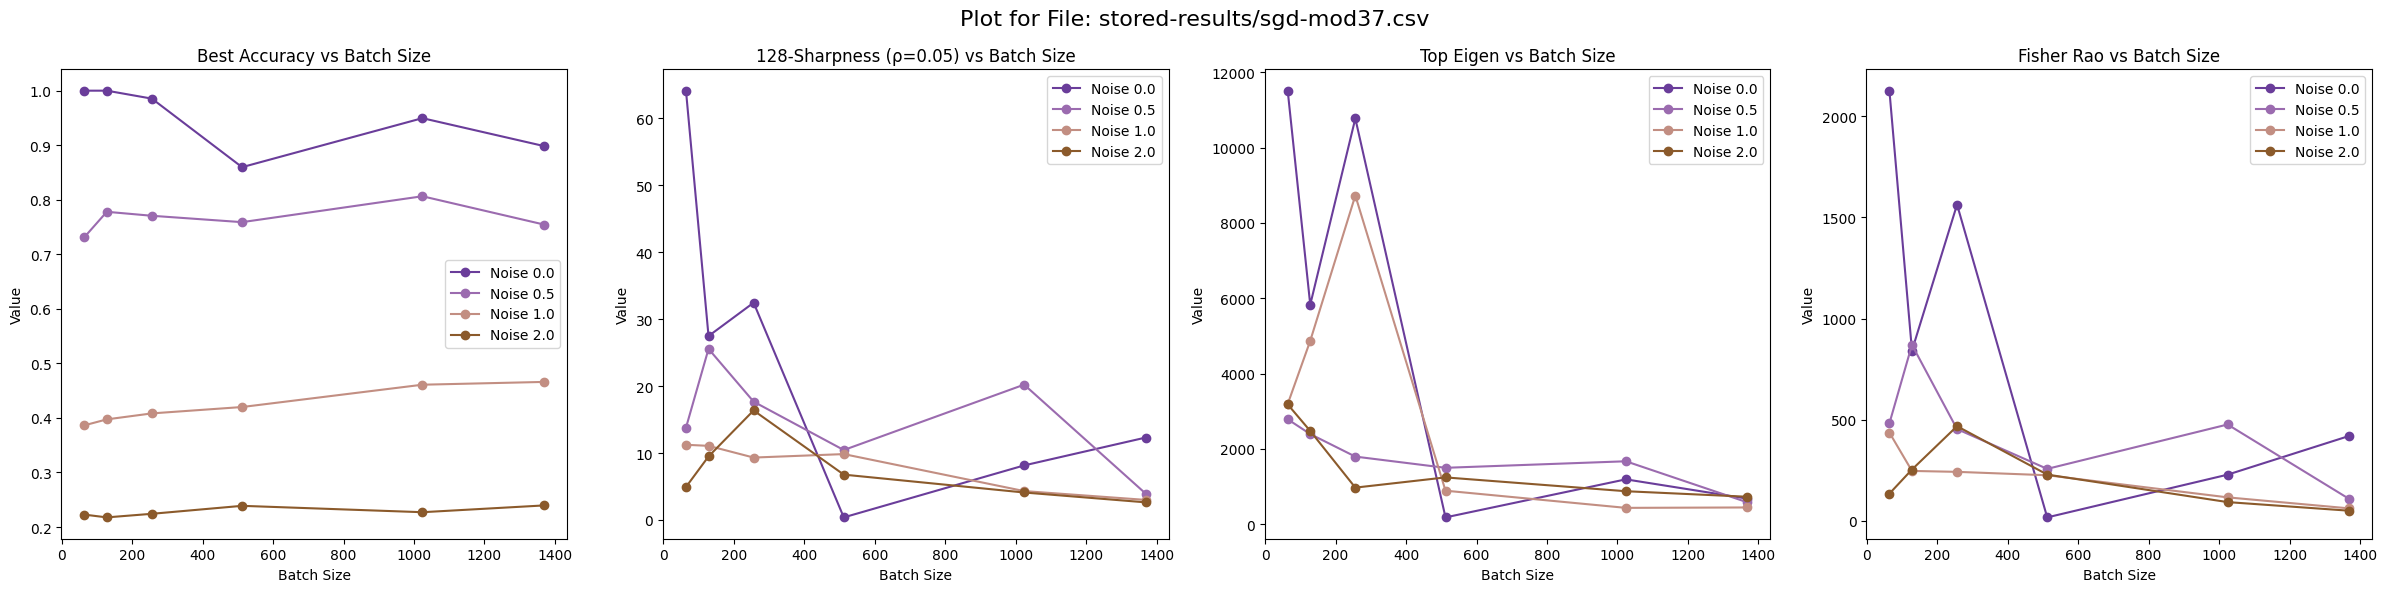

In [5]:
plot(sgd_mod37)